In [1]:
!pip3 install autokeras 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.3 MB/s 
     |████████████████████████████████| 135 kB 47.8 MB/s 
     |████████████████████████████████| 1.6 MB 46.0 MB/s 


In [ ]:
from pprint import pprint

import sklearn.datasets
import sklearn.metrics
import pandas as pd
import numpy as np

import autokeras as ak

LOADING DATA

In [ ]:
TrainDataSet= pd.read_csv('../content/tweets.csv')
TrainDataSet.head()


,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


EXPLORATORY DATA ANALYSIS OF TW

In [ ]:
Grouped_Disaster = TrainDataSet.groupby(['target'])['id'].count().reset_index()
labels = ['Disaster','Non-Disaster']
print(Grouped_Disaster)


   target    id
0       0  9256
1       1  2114


In [ ]:
TrainDataSet['tweetlength'] = TrainDataSet['text'].apply(lambda x:  len(str(x)))
TrainDataSet.head(5)

,id,keyword,location,text,target,tweetlength
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,125
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,131
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,63
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,87
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,140


In [ ]:
TrainDataSet['wordcount'] = TrainDataSet['text'].apply(lambda x:  len(str(x).split()))
TrainDataSet.head(5)

,id,keyword,location,text,target,tweetlength,wordcount
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,125,19
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,131,23
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,63,7
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,87,8
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,140,23


DATA CLEANING

In [ ]:
import re
TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', str(x)))
TrainDataSet.head(3)

,id,keyword,location,text,target,tweetlength,wordcount
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,125,19
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,131,23
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership,1,63,7


In [ ]:
#REMOVE # FROM TW
TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: re.sub(r'#', '', str(x)))
TrainDataSet.head(3)

,id,keyword,location,text,target,tweetlength,wordcount
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,125,19
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,131,23
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership,1,63,7


In [ ]:
#REMOVE HTML tags FROM TW
TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(x)))
TrainDataSet.tail(3)

,id,keyword,location,text,target,tweetlength,wordcount
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,139,23
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,105,17
11369,11369,wrecked,NaN,Jake Corway wrecked while running 14th at IRP.,1,46,8


In [ ]:
TrainDataSet.head(20)

,id,keyword,location,text,target,tweetlength,wordcount
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,125,19
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,131,23
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership,1,63,7
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership,1,87,8
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,140,23
5,5,ablaze,OC,"If this child was Chinese, this tweet would ha...",0,122,23
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1,139,21
7,7,ablaze,Bharat,Asansol: A BJP office in Salanpur village was ...,1,131,24
8,8,ablaze,"Accra, Ghana","National Security Minister, Kan Dapaah's side ...",0,135,18
9,9,ablaze,Searching,This creature who’s soul is no longer clarent ...,0,127,18


AUTOML MODEL

In [ ]:
import tensorflow as tf
import os
from sklearn.datasets import load_files

In [ ]:
#separo datps de las etiquetas de los resultados


x = TrainDataSet.drop(['target'],axis=1)

y = np.array(TrainDataSet['target'])


#separo datos en trainig y test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size = 0.2)

x_train = np.array(X_train)
y_train = np.array(y_train)
x_test = np.array(X_test)
y_test = np.array(y_test)



print(x_train,y_train)

[[11219 'wounds' 'Bahrain'
  'time heals all wounds but scars you take them to the grave' 58 12]
 [2842 'curfew' nan
  "Since 'Kashmir is under curfew', Nazreen may not be able to g… " 86 13]
 [4695 'electrocute' nan
  'Veigar with electrocute rn is HILARIOUSLY op...... 17/3 and 20/5 after not playing him for like 4 months'
  104 18]
 ...
 [8322 'quarantined' nan
  "A multi-polar world is re-emerging. The economic might of the USA can't sustain its aggression after its European ally…"
  119 19]
 [7082 'landslide' nan
  'Taiwan’s president wins second term with landslide victory over pro-Beijing rival. Congratulations 👏 '
  117 14]
 [139 'airplane%20accident' 'Ilawe-Ekiti, Nigeria'
  'Just dial 112 toll-free from your phone in the event that you wish to report fire, flood, theft, armed robbery, k… '
  138 22]] [0 1 0 ... 0 0 0]


In [ ]:
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3]) 

(9096, 6)
(9096,)
[0 1 0]


In [ ]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data classifier with training data.
history = clf.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y)
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

Trial 3 Complete [00h 00m 16s]
val_accuracy: 0.8188214302062988

Best val_accuracy So Far: 0.8188214302062988
Total elapsed time: 00h 00m 55s
Epoch 1/10
285/285 [==============================] - 2s 4ms/step - loss: 0.4961 - accuracy: 0.8079 - val_loss: 0.4714 - val_accuracy: 0.8188
Epoch 2/10
285/285 [==============================] - 1s 3ms/step - loss: 0.4771 - accuracy: 0.8129 - val_loss: 0.4689 - val_accuracy: 0.8188
Epoch 3/10
285/285 [==============================] - 1s 3ms/step - loss: 0.4748 - accuracy: 0.8129 - val_loss: 0.4672 - val_accuracy: 0.8188
Epoch 4/10
285/285 [==============================] - 1s 3ms/step - loss: 0.4728 - accuracy: 0.8129 - val_loss: 0.4656 - val_accuracy: 0.8188
Epoch 5/10
285/285 [==============================] - 1s 3ms/step - loss: 0.4709 - accuracy: 0.8129 - val_loss: 0.4641 - val_accuracy: 0.8188
Epoch 6/10
285/285 [==============================] - 1s 4ms/step - loss: 0.4687 - accuracy: 0.8129 - val_loss: 0.4628 - val_accuracy: 0.8188
Epoch 

evaluar red

In [ ]:
res = clf.evaluate(x_test,y_test)

72/72 [==============================] - 1s 7ms/step - loss: 0.4632 - accuracy: 0.8188


Predecir nuevos resultados

In [ ]:
y_pred = clf.predict(x_test)

for i in range(50):
  print("valor real: ", y_test[i])
  print("valor estimado: ", y_pred[i])
  print("---------------------------------- ")

72/72 [==============================] - 1s 12ms/step
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  0
valor estimado:  [0.]
---------------------------------- 
valor real:  1
valor estimado:  [0.]
---------------------------------- 
valor real:  0
valor estimado:  [0.]
---------------------------------

Curva de aprendizaje

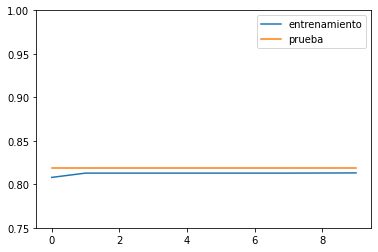

[0.8079375624656677, 0.8128848075866699, 0.8128848075866699, 0.8128848075866699, 0.8128848075866699, 0.8128848075866699, 0.8128848075866699, 0.8128848075866699, 0.8129947185516357, 0.8131046891212463]


In [ ]:
from matplotlib import pyplot
f, ax = pyplot.subplots()
ax.set_ylim(bottom=0.75)
ax.plot(history.history['accuracy'], label='entrenamiento')
ax.plot(history.history['val_accuracy'], label='prueba')
pyplot.legend()
pyplot.show(f)
print(history.history['accuracy'])